In [112]:
import math
import numpy as np
import cvxpy as cp
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt

In [113]:
A = np.array(
    [
        (
            [1, t, t**2, t**3] + 
            [math.cos(2*math.pi*t/x) for x in range(1,61)] +
            [math.sin(2*math.pi*t/y) for y in range(1, 61)]
        ) for t in range(1, 61)
    ]
)

y = []
with open("euro-usd-data.csv") as f:
    for row in f:
        if row[0] != 't':
            y.append(float(row.split(',')[2]))

In [114]:
x = cp.Variable(124)
objective = cp.Minimize(cp.sum_squares(A @ x - y))
prob = cp.Problem(objective)
result = prob.solve()
x.value

array([ -17.75 ,   63.881,   -4.305,    0.06 ,  -17.75 ,   -0.001,
          0.001,   -0.001,   -0.001,   -0.008,   -0.063,   -0.792,
         -4.352,   24.219,  156.829, -201.597,  -94.755, -112.882,
         28.312,   -9.874,  -26.783,   34.072,   71.124,   55.257,
         24.885,   12.364,   20.839,   37.646,   50.404,   53.612,
         47.943,   37.074,   24.992,   14.578,    7.27 ,    3.315,
          2.201,    3.076,    5.039,    7.313,    9.321,   10.693,
         11.242,   10.922,    9.786,    7.948,    5.552,    2.752,
         -0.306,   -3.491,   -6.69 ,   -9.814,  -12.792,  -15.573,
        -18.125,  -20.426,  -22.467,  -24.249,  -25.779,  -27.067,
        -28.13 ,  -28.984,  -29.647,  -30.139,    0.   ,   -0.   ,
          0.   ,    0.003,    0.001,   -0.01 ,   -0.027,   -0.319,
         -6.754,  -41.521,   72.674,  268.807, -231.363,   59.368,
        -52.236, -242.753,  -21.88 ,  106.577,  -22.345, -165.553,
       -155.209,  -28.183,   94.225,  139.922,  105.191,   25.

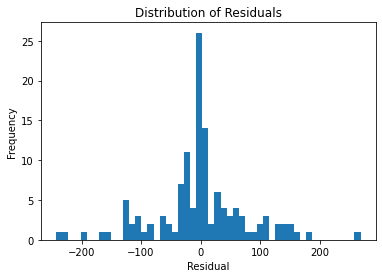

In [115]:
plt.hist(x.value, bins=50)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

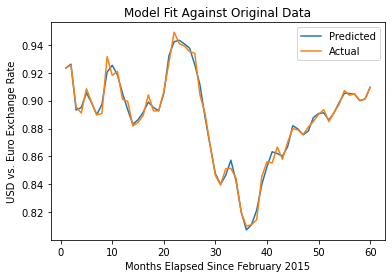

In [116]:
predictions = A @ x.value
plt.plot(range(1, 61), predictions, label='Predicted')
plt.plot(range(1, 61), y, label='Actual')
plt.legend()
plt.xlabel('Months Elapsed Since February 2015')
plt.ylabel('USD vs. Euro Exchange Rate')
plt.title('Model Fit Against Original Data')
plt.show()